# Example Problems

## Imports

In [1]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation


# Data generation helpers
from solver_functions import (
    generate_grid_values,
    generate_nonuniform_radial,
    generate_cartesian_grid_on_disk,
    trap_2d_on_disk,
    plot_on_disk_with_error,
    plot_on_disk,
    poisson_solver
)



ModuleNotFoundError: No module named 'solver_functions'

## Problem Parameters

In [ ]:

# =========================
# Parameters 
# =========================

#Quadrature rule: 
    #1: Trapezoidal Rule
    #2: Simpson's Rule 
quad_rule = 1

# Boundary condition choice:
    # 1: Dirichlet
    # 2: Neumann
bc_choice = 1


# u: true solution
# f: forcing
# g: boundary data
u = lambda x, y: x**2 + 3*y**3
f = lambda x, y: 2 + 18*y
g = lambda x, y: u(x, y)

# M: Annuli (radial points)
# N: angles (azimuthal points)
M = 64
N = 64

# R: Radius of disk.
R = 1.0

# Declare if the radial mesh is uniform:
    # 1 : Uniform radial mesh.
    # 0 : Nonuniform radial mesh.
rad_unif = 1


## Data Generation

In [ ]:

# =========================
# Data Generation
# =========================
# Choose the radial mesh.
if rad_unif == 1:
    iRadius = np.linspace(0.0, R, M)
elif rad_unif == 0:
    iRadius = generate_nonuniform_radial(M, R)
else:
    raise ValueError('Incorrect index for "rad_unif"')

# generate the azimuthal mesh.
iAngle = (2*np.pi / N) * np.arange(1, N+1)  

# Map the polar cordinates to cartesian coordinates
x_coord, y_coord = generate_cartesian_grid_on_disk(iAngle, iRadius)

# Generate function values on our disk.
f_values = generate_grid_values(f, x_coord, y_coord)
g_values = generate_grid_values(g, x_coord[:, M-1], y_coord[:, M-1])  # MATLAB (:,M) -> Python [:, M-1]
u_true   = generate_grid_values(u, x_coord, y_coord)

# Parameter for the Nuemann condition: We use the constant Fourier
# coefficients for each 'r' for the 'phi_0' mentioned in the paper. That is, the
# parameter which will match our true solution since the solution to the 
# Poisson equation with Nuemann boundary conditions is /not/ unique.
if bc_choice == 2:
    # We don't have to invoke the FFT since the constant coefficient is just the regular summation.
    u_fourier_0 = np.zeros(M)
    for m in range(M):
        u_fourier_0[m] = np.sum(u_true[:, m]) / N
else:
    # In this case, we don't need the parameter 'phi_0' for the Dirichlet boundary condition.
    u_fourier_0 = np.array([])




## Solving

In [ ]:
# =========================
# Solving
# =========================

# Compute the solution.
u_approx = poisson_solver(
    f_values, g_values, u_fourier_0,
    N, M, iRadius, iAngle, R,
    quad_rule, bc_choice,
    rad_unif
)


## Errors

In [ ]:

# =========================
# Errors
# =========================

# L_inf Error.
ptwise_error = np.abs(u_true - u_approx)
L_inf_error = np.max(np.max(ptwise_error))

# Relative L_inf Error.
L_inf_error_rel = L_inf_error / np.max(np.max(np.abs(u_true)))

# L_2 Error.
L2_error = np.sqrt(trap_2d_on_disk(ptwise_error**2, iRadius, iAngle))

# Relative L_2 Error.
L2_error_rel = L2_error / trap_2d_on_disk(u_true**2, iRadius, iAngle)



## Graphing

[align] transpose=False, reverse_theta=False, row_shift=0, ||Δ||_∞ after align = 2.993e-04


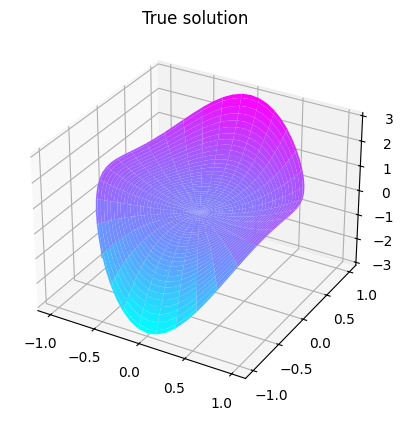

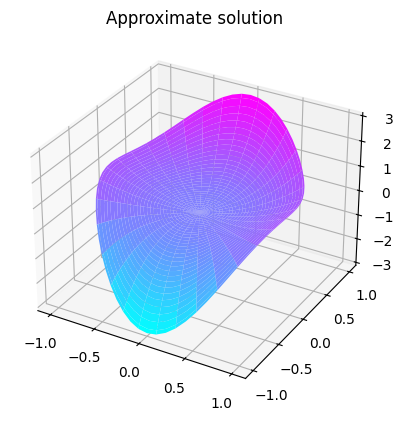

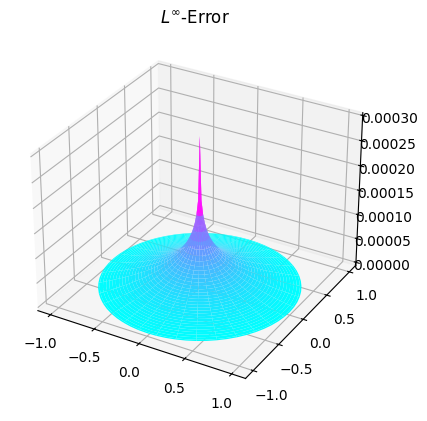

In [ ]:

# Graphing 
# This plots the true solution, the approximate solution and the L_inf error.
plot_on_disk_with_error(x_coord, y_coord, u_approx, u_true)

#We can uncomment and use this if true solution is not known
#plot_on_disk(x_coord, y_coord, u_approx)

